In [4]:
import numpy as np
from helpers import *
from implementations import *
from data_processing_poly import *
from hyperparams import *
# from classification import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# loading train data (takes 10 secs, avoid spamming cell)
yb, input_data, ids = load_csv_data("train.csv")
dimensions = np.shape(input_data)
N = dimensions[0]
P = dimensions[1]
yb = np.reshape(yb,[N,1])
yb[yb==-1] = 0

#voir si fait du sens de prendre le log apres std ??


In [3]:
tx_rem = standardize_data_mean(input_data)
y_new = yb
print(np.std(tx_rem,1))

[0.81448779 0.9561932  1.22461282 ... 0.78635286 1.18742128 1.20429239]


In [ ]:
"""#standardisation avec racine cube pour les colones jolies comme ca : 
col_cube_root =[4,8,13,16,26]
for x in col_cube_root :
     c = tx_rem[:,x]
     mean = np.mean(c, axis=0)
     std_dev = np.std(c, axis=0)
     c = (c-mean) / std_dev
     c= c**(1/3)

     
    
     plt.hist(c, bins=40)
     plt.xlabel('X label' + np.str(x))
     plt.ylabel('Y label')
     plt.show()"""

In [ ]:
"""#Test Box-Cox : permet de transformer skewed data en normal (normalement)
lambdas = [-1,-0.5,0.5,1]
for lambda1 in lambdas : 
    for lambda2 in lambdas : 
        c = tx_rem[:,1]
        #mean = np.mean(c, axis=0)
        #std_dev = np.std(c, axis=0)
        #tx_rem[:,1] = (c -mean*np.ones(np.shape(c))) / std_dev
        #x_box = ((c+lambda2)**lambda1 - 1)/lambda1
        x_box= 1/c
        plt.hist(x_box, bins=40)
        plt.xlabel('X label' + 'lambda1 = '+ np.str(lambda1) + 'lambda2='+ np.str(lambda2))
        plt.ylabel('Y label')
        plt.show()"""

In [ ]:
columns_to_expand = [0,1,2]#[0,1,2,3,5,6,7,8,9,10,11,12,13,14,16,17,19,22,24,25,26,27,28]
degrees = [2,3,4]
initial_w = np.ones([tx_rem.shape[1],1])
lambdas = np.logspace(-4, 0, 20)
max_iters = 30
gamma = 0.8
x_rem = phi_optimized(y_new,tx_rem,degrees,P, 7, initial_w, lambdas, gamma,max_iters,columns_to_expand)


In [ ]:

print(tx_rem.shape)

In [4]:
# Construct the matrix with the polynomial expansion for each column
size_x_tr = tx_rem.shape[0]
gamma = 0.4 #Quite low to avoid NaN
lambdas = np.logspace(-2, -1.8, 20) #the lambda tested for the logistic regression, for each lambda we test each degree
initial_w = np.ones([size_x_tr,1])
max_iters = 20
degrees_tested = [1,2,3] #the degrees tested for the polynoms
columns_to_expand = [1,2,3,5,6,7,8,9,10,11,12,13,14,16,17,19,22,24,25,26,27,28]
phi, degrees_poly = phi_optimized(y_new,tx_rem,degrees_tested,P, 4, initial_w, lambdas, gamma,max_iters,columns_to_expand)

print(phi.size)

/Users/toye/Desktop/ML_project1-master-2/implementations.py:229: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))
/Users/toye/Desktop/ML_project1-master-2/implementations.py:246: RuntimeWarning: divide by zero encountered in log
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )
/Users/toye/Desktop/ML_project1-master-2/implementations.py:246: RuntimeWarning: invalid value encountered in matmul
  loss = -(1/len(y)) * ( y.T @ np.log(sigmoid(tx@w)) + (1-y).T @ np.log(1-sigmoid(tx@w)) )


9750000


In [5]:
print(phi.shape)
print(degrees_poly)

(250000, 39)
[1, 1, 1, 1, 2, 3, 1, 1, 3, 2, 3, 1, 2, 1, 2, 1, 1, 3, 2, 1, 3, 2]


In [ ]:
phi = np.delete(phi,29,1)
phi = np.delete(phi,23,1)
phi = np.delete(phi,21,1)
phi = np.delete(phi,4,1)

In [6]:
#standardisation entre 0 et 1

for x in range(phi.shape[1]) :
     c = phi[:,x]
     min = np.min(c, axis=0)
     max = np.max(c, axis=0)
     phi[:,x] = (c-min) / max
     


In [7]:
#phi = add_w0(phi,phi.shape[0])   
tx_reduced = (phi[range(10000),:])  # 100x30 data for faster testing of regression
y_reduced = (y_new[range(10000)])
ratio = 0.8

y_tr, x_tr, y_te, x_te = split_data(y_reduced,tx_reduced,ratio)


/var/folders/xl/7xxnqhrj2l7f4ypwccgd0rnm0000gn/T/ipykernel_10383/4154100864.py:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.xlabel('X label' + np.str(x))


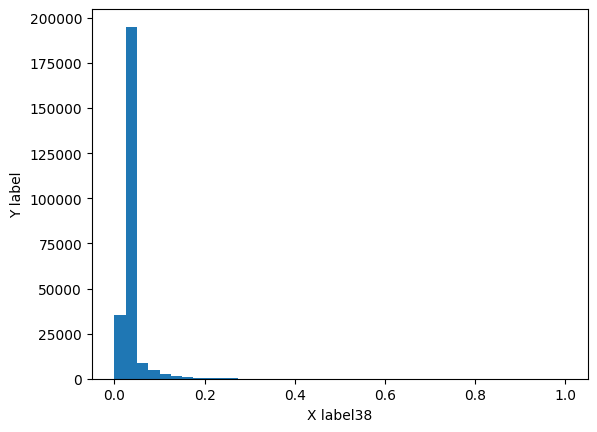

In [12]:
plt.hist(tx_rem[:,27], bins=40)
plt.xlabel('X label' + np.str(x))
plt.ylabel('Y label')
plt.show()

In [8]:
initial_w = np.zeros([x_tr.shape[1],1])   
max_iters = 1000
gamma = 0.3
w_opt,loss = logistic_regression(y_tr,x_tr,initial_w,max_iters,gamma)

In [9]:
print(loss)
print(w_opt.shape)

0.5487562650250946
(40, 1)


In [10]:
def get_accuracy(y_predictions, y_te):
    """Checks whether prediction are accurate by compraing with y_te
    
    Args: 
        predictions:
        y_te:
    
    Returns:
        len(good_guess):
        len(bad_guess):
    """ 
    
    difference = (y_predictions-y_te)
    good_guess = difference[difference==0]
    bad_guess = difference[difference!=0]
    print(len(good_guess),len(bad_guess))
    
    return len(good_guess), len(bad_guess)

In [11]:
temporary = sigmoid(x_te@w_opt)
y_result = temporary
y_result[y_result>0.6] = 1
y_result[y_result<0.6] = 0
right, wrong = get_accuracy(y_result, y_te)
print(right/(right+wrong))

1410 590
0.705


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import dist,ceil



def get_Kneighbors(x_tr, K, new_sample):
    """Finds K nearest neighbors using euclidian distance
    
    Args:
        x_tr: 
        K: 
        new_sample: 
        
    Returns:
        Kneighbors:
        Kindexes:    
    """
    samples = np.shape(x_tr)[0] 
    neighbors = np.zeros((samples,1))
    Kneighbors = np.zeros((K,1))
    Kindexes = np.zeros((K,1))
    
    for i in range (samples):
        neighbors[i] = dist(x_tr[i,:], new_sample)  #computes euclidean distance between two samples
           
    for j in range (K):
        Kneighbors[j] = min(neighbors)
        idx = np.argmin(neighbors)
        #remove for the next iteration the last smallest value:
        Kindexes[j] = idx
        neighbors = np.delete(neighbors, idx)
        
    return Kneighbors, Kindexes  




def get_prediction(Kindexes, K, y_tr):
    """Predicts y = 0 or 1 using the prediction of K-nearest neighbors
    
    Args:
        Kindexes: 
        K:  
        
    Returns:
        predictions:
        new_prediction:    
    """
    
    predictions = np.zeros((K,1))
    
    for m in range (K):
        predictions[m] = y_tr[np.int(Kindexes[m])]  #warning because of forced int()
        
    scoreKNN = np.mean(predictions)
        
    if scoreKNN >= 0.5:
        new_prediction = 1
    else:
        new_prediction = 0
        
    return scoreKNN, new_prediction



def get_accuracy(y_results, y_te, score):
    """Checks whether prediction are accurate by compraing with y_te
    
    Args: 
        predictions:
        y_te:
    
    Returns:
        len(good_guess):
        len(bad_guess):
    """ 
    
    difference = (y_results-y_te)
    good_guess = difference[difference==0]
    bad_guess = difference[difference!=0]
    accuracy = len(good_guess)/(len(good_guess)+len(bad_guess))
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    
    for i in range(y_results.shape[0]):
        if difference[i] == 1:
            FP +=1
        if difference[i] == -1:
            FN +=1
        else :
            if y_results[i] == 1:
                TP +=1
            else:
                TN +=1       
                
    precision = TP/(TP+FP)  
    recall = TP/(TP+FN)
    auc = get_auc(score, y_te)
    #print(f"How well our model can classify binary outcomes: accuracy of {accuracy}, precision of {precision}, and recall of {recall}")
    print("How well our model can classify binary outcomes: accuracy of %.3f, precision of %.3f, recall of %.3f, and AUC score of %.3f" % (accuracy, precision, recall, auc))
    
    return accuracy, precision, recall



def get_auc(score, y_results):

    y = y_results

    # false positive rate
    FPR = []
    # true positive rate
    TPR = []
    # Iterate thresholds from 0.0 to 1.0
    thresholds = np.arange(0.0, 1.01, 0.001)
    print(len(thresholds))

    # get number of positive and negative examples in the dataset
    P = sum(y)
    N = len(y) - P

    # iterate through all thresholds and determine fraction of true positives
    # and false positives found at this threshold
    for thresh in thresholds:
        FP=0
        TP=0
        thresh = round(thresh,2) 
        for i in range(len(score)):
            if (score[i] >= thresh):
                if y[i] == 1:
                    TP += 1
                if y[i] == 0:
                    FP += 1            
        FPR = np.append(FPR,FP/N)
        TPR = np.append(TPR, TP/P)

    #computing Arean Under Curve using the trapezoidal method
    auc = -1 * np.trapz(TPR, x=FPR)
    print(auc)

    
    plt.plot(FPR, TPR, marker='.', color='darkorange', label='ROC curve', clip_on=False)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label = 'No Discrimination')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve, AUC = %.2f'%auc)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.savefig('AUC_example.png')
    plt.show()
    
    return auc

In [ ]:
temporary = sigmoid(x_te@w_opt)
y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
score = sigmoid(x_te@w_opt)
accuracy, precision, recall = get_accuracy(y_result, y_te, score)

In [ ]:
initial_w = np.ones([x_tr.shape[1],1])
max_iters = 1000
best_lambda, best_rmse = cross_validation_demo(y_tr, x_tr, 7, 4,initial_w,  np.logspace(-4, 0, 70), 3 ,gamma, max_iters )

In [ ]:

w_opt2,loss2 = reg_logistic_regression(y_tr, x_tr, best_lambda, initial_w, max_iters, gamma)
print(loss2)

In [ ]:
temporary = sigmoid(x_te@w_opt2)
y_result = temporary
y_result[y_result>0.5] = 1
y_result[y_result<0.5] = 0
score = sigmoid(x_te@w_opt2)
accuracy, precision, recall = get_accuracy(y_result, y_te, score)